# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import seaborn as sns
import matplotlib.pyplot as plt

# 2. Import Dataset

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
pd.options.display.max_columns = 100

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 3. Exploratory Data Analysis (EDA)

### Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30492 entries, 0 to 30491
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    30492 non-null  float64
 1   V1      30492 non-null  float64
 2   V2      30492 non-null  float64
 3   V3      30492 non-null  float64
 4   V4      30492 non-null  float64
 5   V5      30492 non-null  float64
 6   V6      30492 non-null  float64
 7   V7      30492 non-null  float64
 8   V8      30492 non-null  float64
 9   V9      30492 non-null  float64
 10  V10     30492 non-null  float64
 11  V11     30492 non-null  float64
 12  V12     30492 non-null  float64
 13  V13     30492 non-null  float64
 14  V14     30492 non-null  float64
 15  V15     30492 non-null  float64
 16  V16     30492 non-null  float64
 17  V17     30492 non-null  float64
 18  V18     30492 non-null  float64
 19  V19     30492 non-null  float64
 20  V20     30492 non-null  float64
 21  V21     30492 non-null  float64
 22

In [6]:
df.shape

(30492, 31)

### Data Description

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000,30492.000000
mean,22518.436049,-0.257786,0.160032,0.634636,0.264679,-0.235216,0.072013,-0.184265,0.027800,0.308198,-0.183266,0.546914,-0.736415,0.379227,0.247839,0.055111,-0.049452,0.111614,-0.107715,-0.030090,0.048778,-0.023556,-0.119567,-0.040574,0.008114,0.130809,0.022916,0.012231,0.005560,80.453836,0.016135
std,15354.209567,1.985947,1.630726,1.888180,1.512630,1.527323,1.334522,1.610536,1.481263,1.321259,1.413158,1.221203,1.653069,1.181667,1.514610,0.963325,1.126986,1.557074,0.944502,0.832526,0.672105,0.921787,0.661998,0.560451,0.590573,0.439113,0.510261,0.415907,0.277867,223.010369,0.125998
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-43.557242,-41.484823,-13.434066,-24.588262,-2.981121,-18.683715,-3.588761,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-4.932733,-13.694584,-22.797604,-8.887017,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,10548.500000,-0.970149,-0.443178,0.232438,-0.685854,-0.810938,-0.665513,-0.611087,-0.160211,-0.482945,-0.609502,-0.304844,-1.855799,-0.434577,-0.228488,-0.503809,-0.510420,-0.318780,-0.565369,-0.527678,-0.158966,-0.243722,-0.544223,-0.177460,-0.328441,-0.132150,-0.333338,-0.063396,-0.008126,6.300000,0.000000
50%,26601.500000,-0.266064,0.157820,0.828595,0.214827,-0.242406,-0.177501,-0.075105,0.038003,0.214299,-0.173917,0.507044,-0.305960,0.310105,0.272274,0.180356,0.056963,0.137860,-0.065370,-0.034134,-0.020669,-0.088056,-0.094884,-0.050526,0.061440,0.171380,-0.056564,0.008949,0.020617,20.000000,0.000000
75%,32478.000000,1.164009,0.813672,1.461948,1.122440,0.312355,0.467439,0.439534,0.301408,1.086042,0.323636,1.299061,0.396436,1.198299,1.086778,0.741323,0.558050,0.641993,0.416075,0.480043,0.166397,0.090115,0.289845,0.076216,0.397930,0.415432,0.303422,0.092857,0.078070,71.592500,0.000000
max,170348.000000,2.132386,22.057729,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,12.701539,12.018913,4.846452,4.465413,7.692209,3.635042,6.098529,9.253526,4.295648,5.228342,17.281859,27.202839,8.361985,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


### Check Missing Value

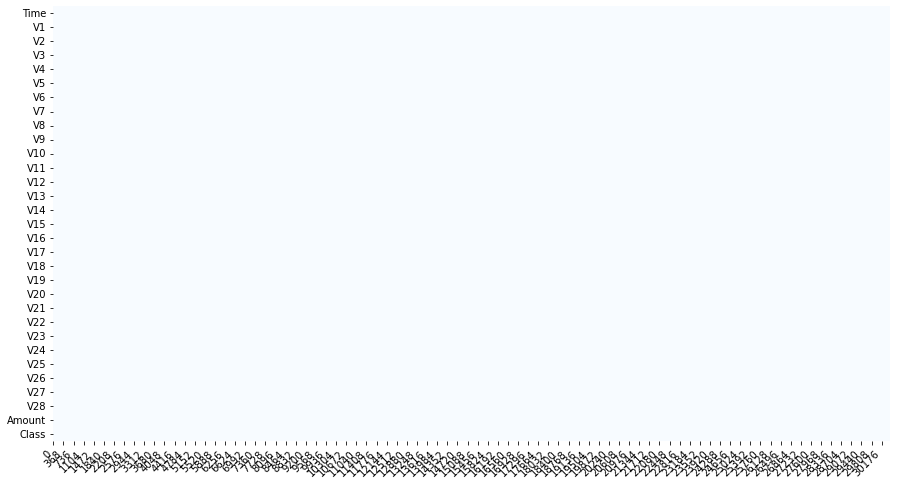

In [8]:
plot_missing_value(df)

`The dataset is clean from missing values`

## A. Numerical Features

### Class Distribution (Target Distribution)

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

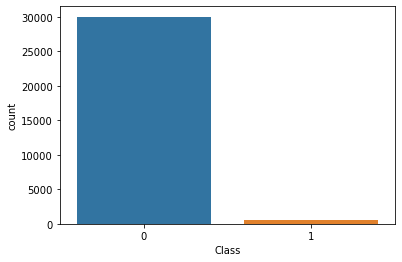

In [9]:
sns.countplot(df.Class)

## Check Imbalance Dataset

In [10]:
df.Class.value_counts()

0    30000
1      492
Name: Class, dtype: int64

`The target variable explains the Imbalance dataset. Therefore, I'll use 'F1-Score' for the scoring of the model.`

### Boxplots

In [11]:
features = df.drop(columns='Class')

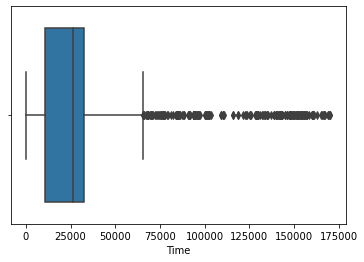

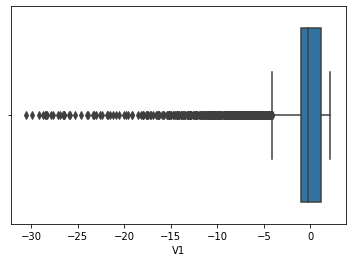

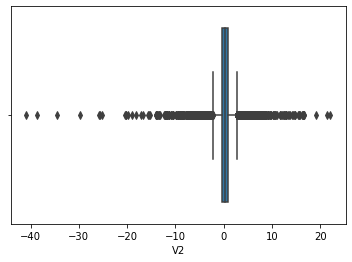

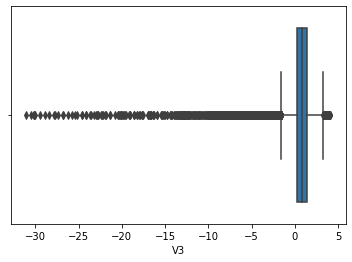

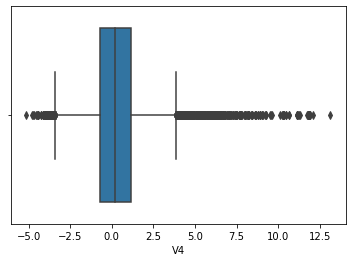

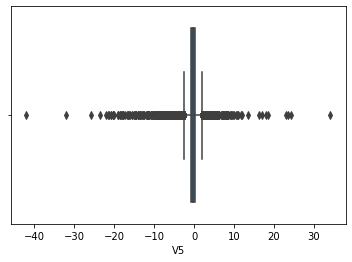

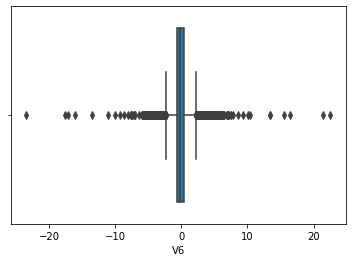

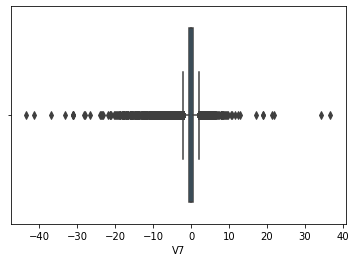

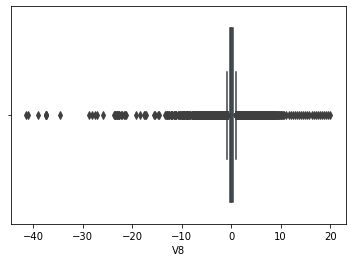

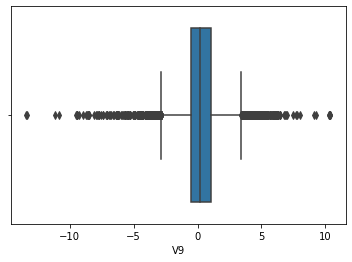

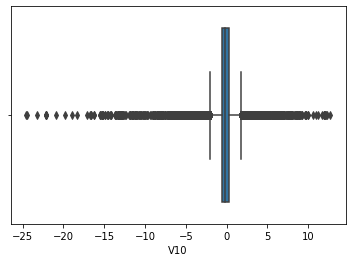

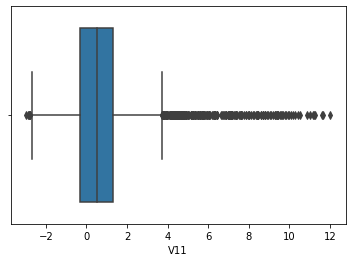

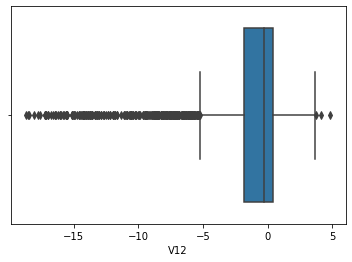

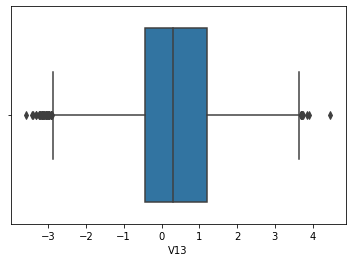

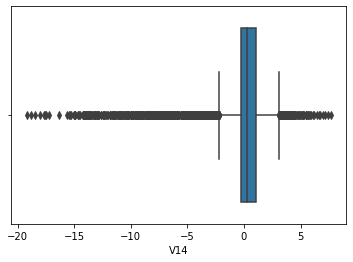

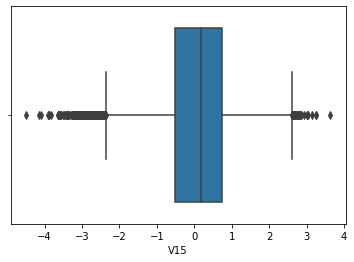

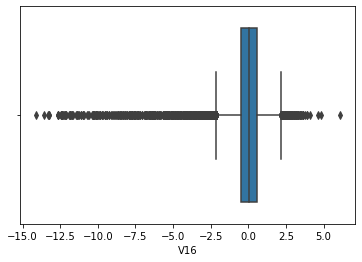

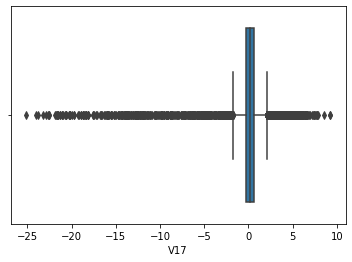

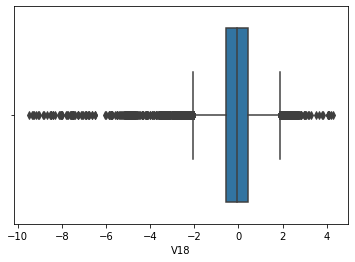

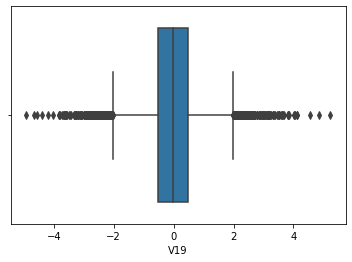

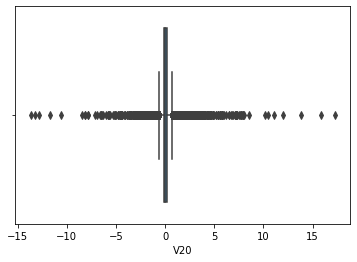

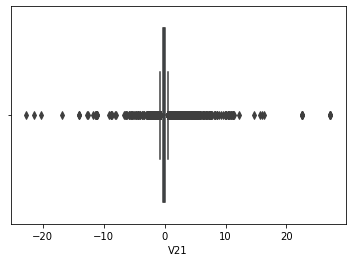

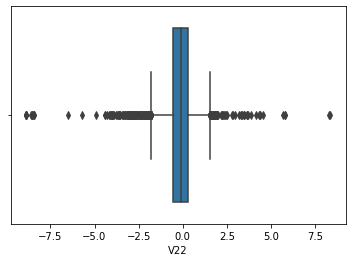

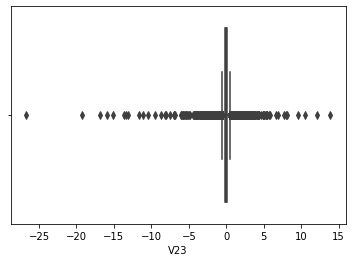

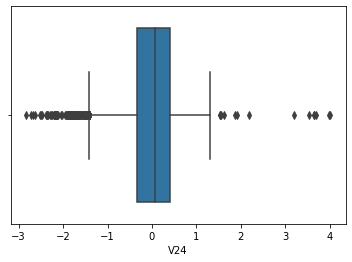

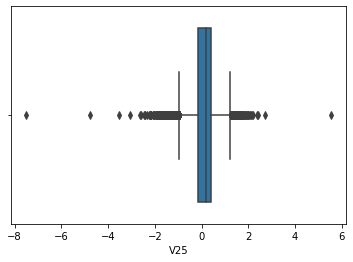

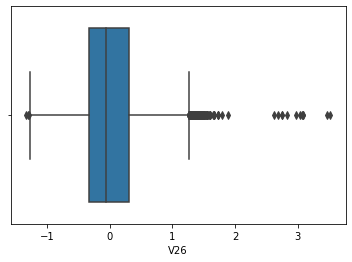

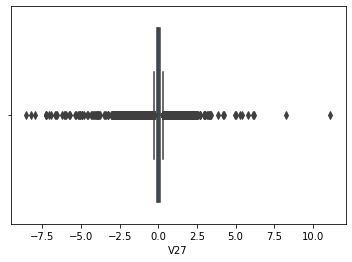

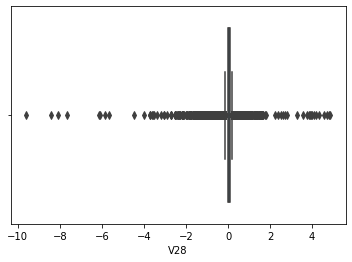

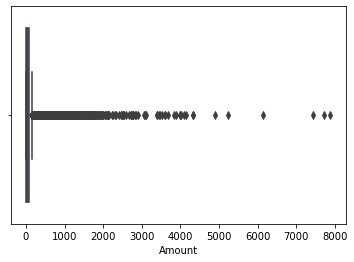

In [12]:
for cards in features:
    sns.boxplot(x= df[cards], data=df)
    plt.show()

### Features Distribution

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

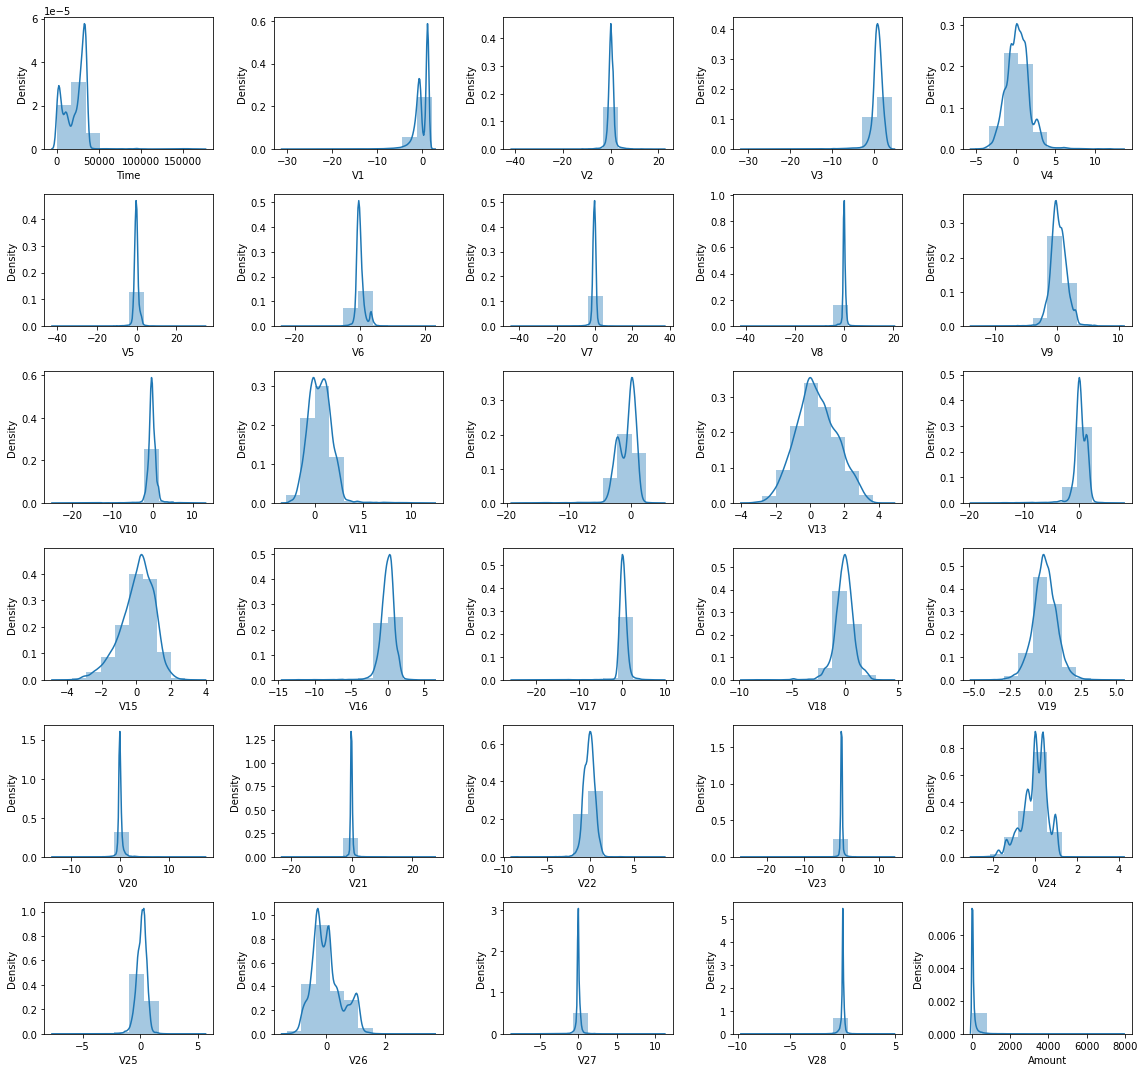

In [13]:
numeric = features

x = plt.figure(figsize=(16, 15))

for i, j in enumerate(features):
    x.add_subplot(6, 5, i+1)
    sns.distplot(df[j], bins=10)
    x.tight_layout()

plt.tight_layout()

## Features vs Target

### Boxplot

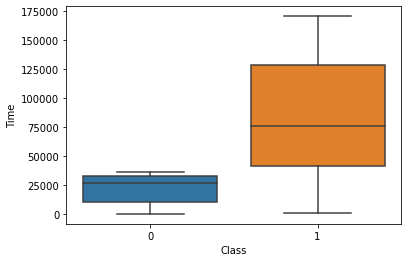

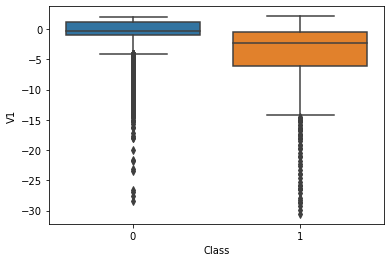

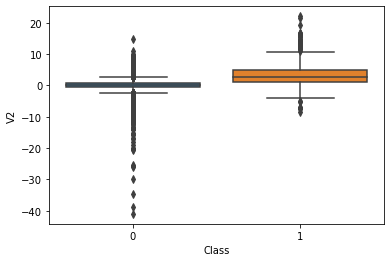

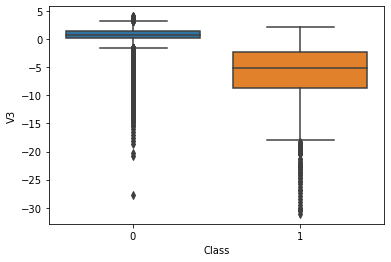

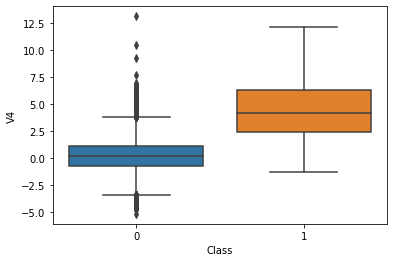

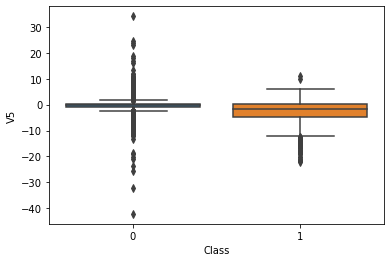

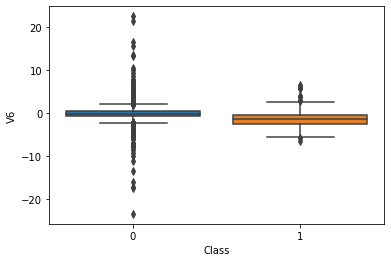

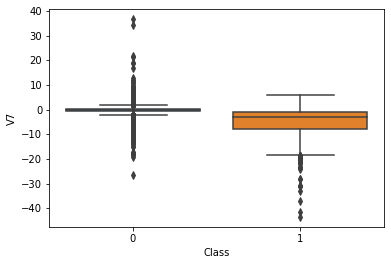

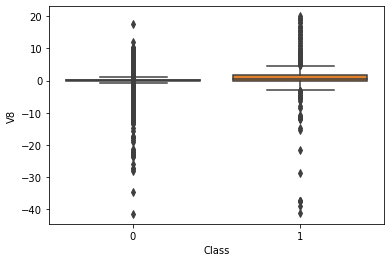

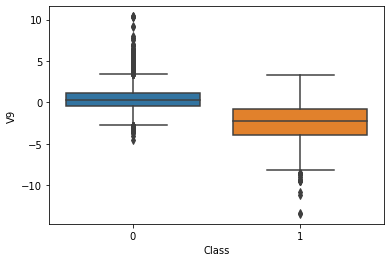

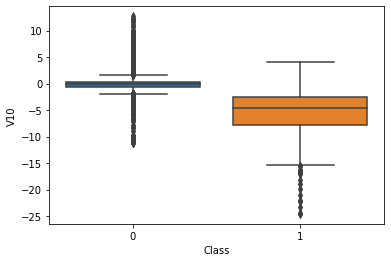

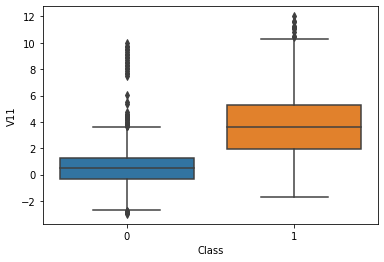

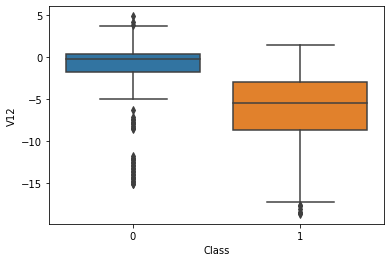

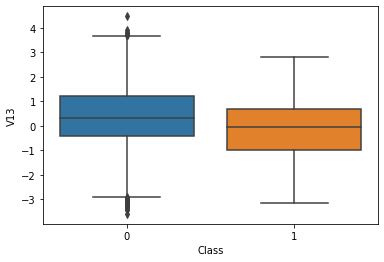

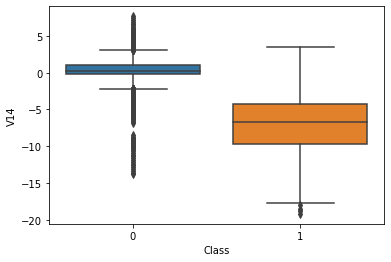

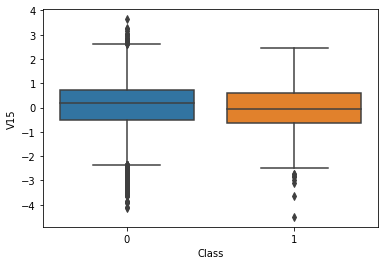

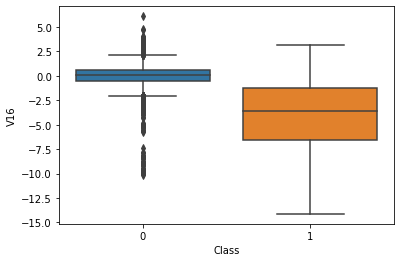

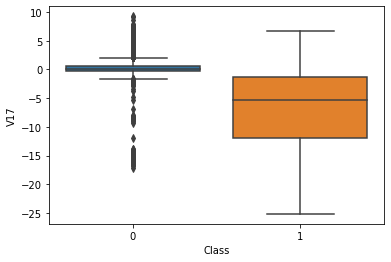

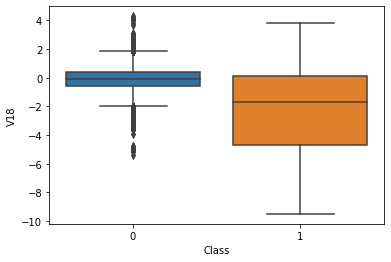

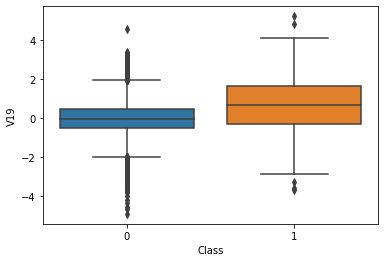

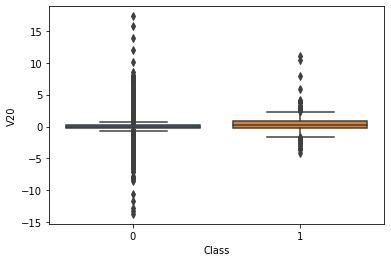

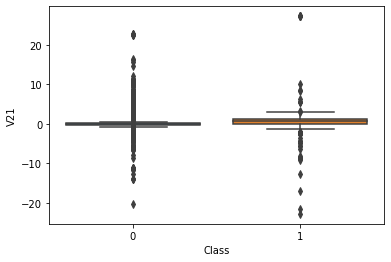

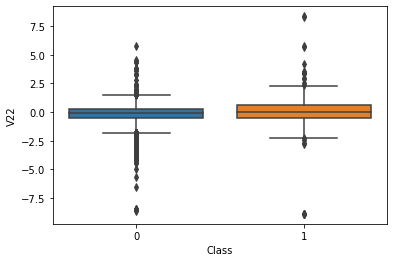

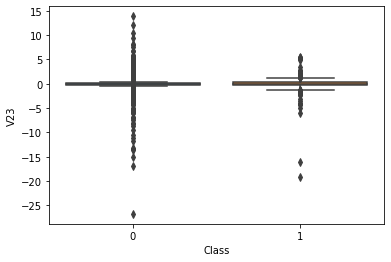

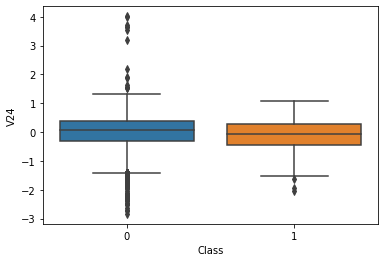

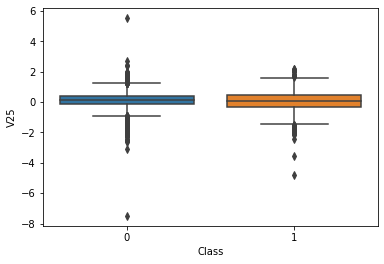

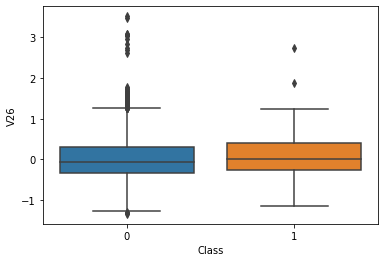

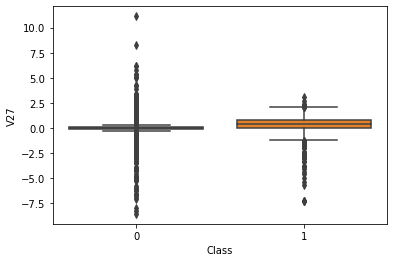

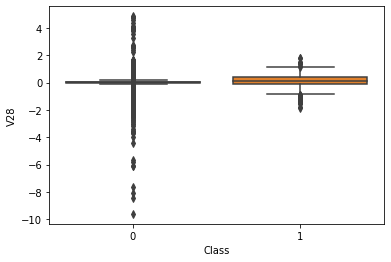

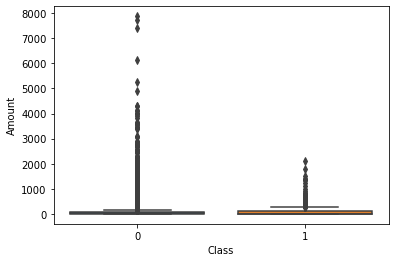

In [14]:
for cards in features:
    sns.boxplot(x= 'Class', y = df[cards], data=df)
    plt.show()

### Distribution of Features by Class

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


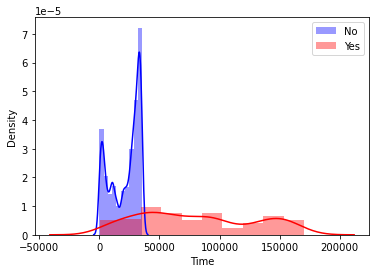

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


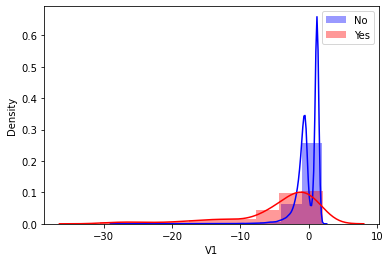

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


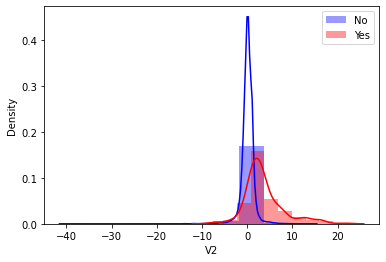

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


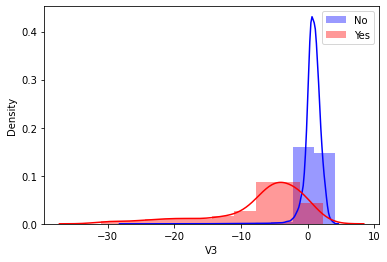

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


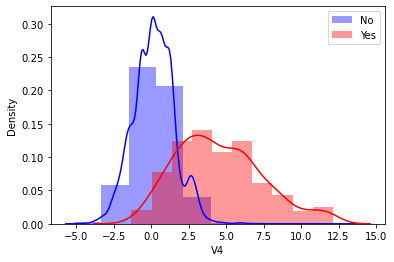

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


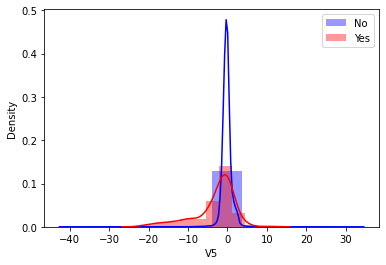

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


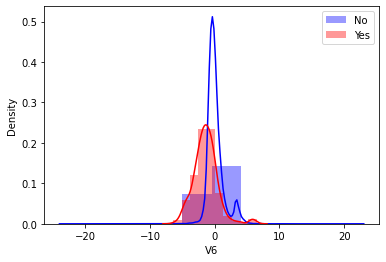

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


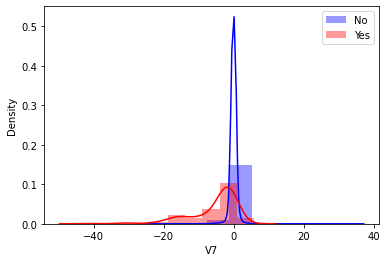

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


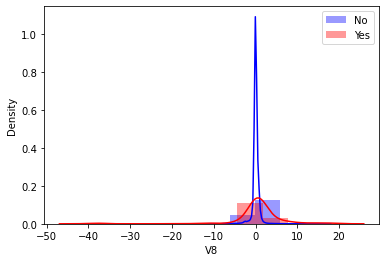

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


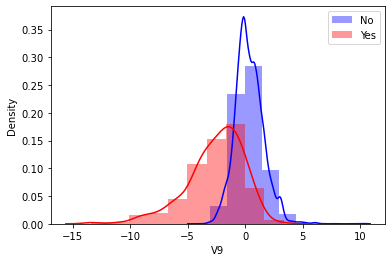

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


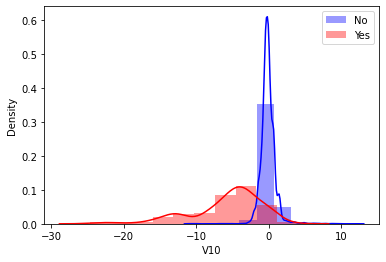

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


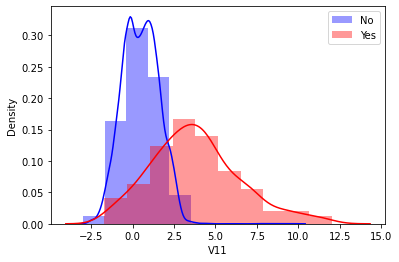

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


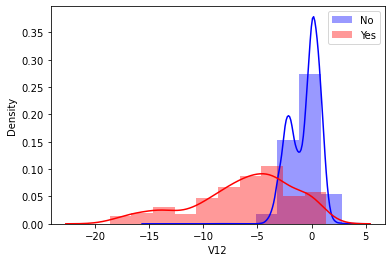

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


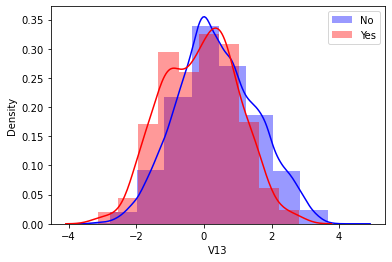

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


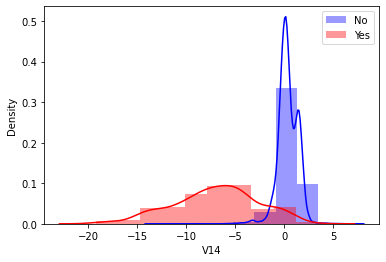

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


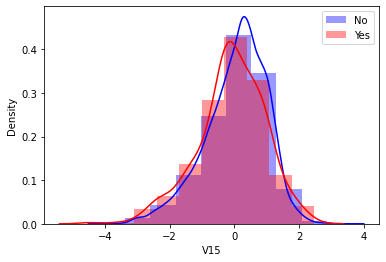

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


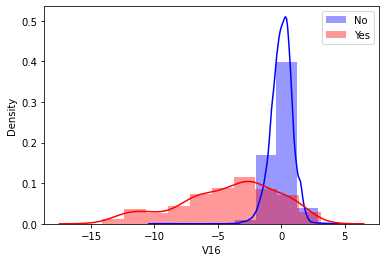

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


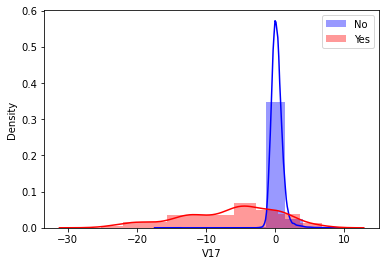

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


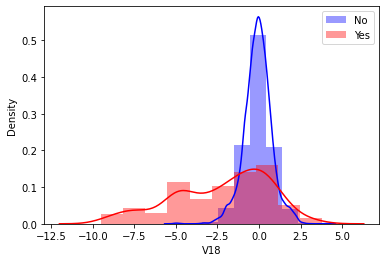

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


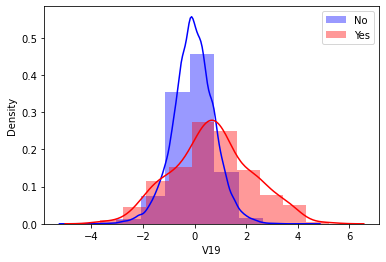

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


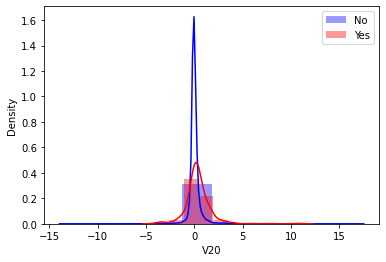

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


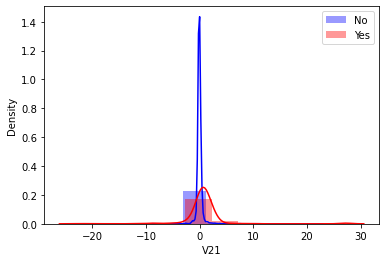

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


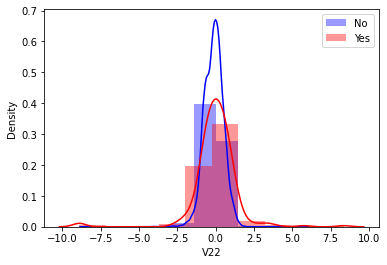

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


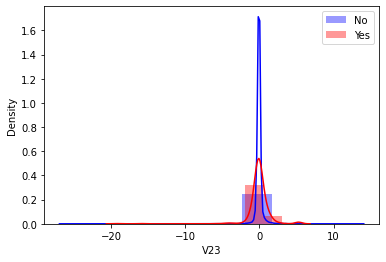

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


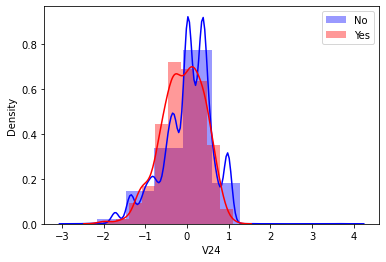

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


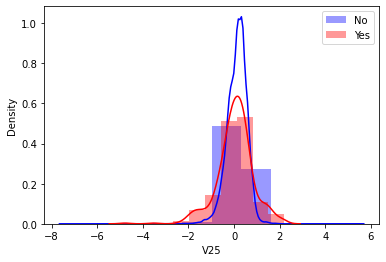

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


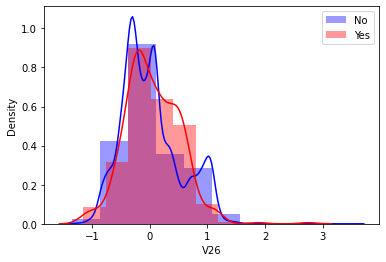

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


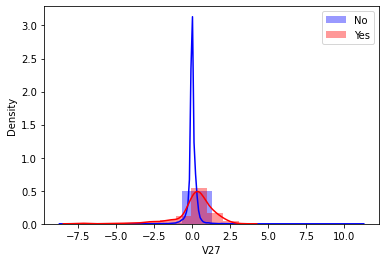

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


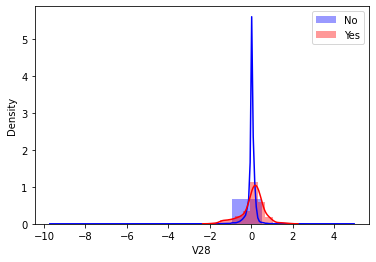

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


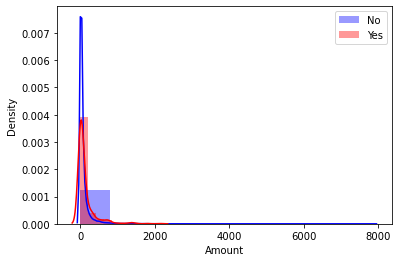

In [15]:
for cards in features:
    sns.distplot(df[cards][df.Class == 0], bins = 10, label = 'No', color = 'b')
    sns.distplot(df[cards][df.Class == 1], bins = 10, label = 'Yes', color = 'r')
    plt.legend()
    plt.show()

## Correlation Ratio

In [16]:
from jcopml.plot import plot_correlation_ratio

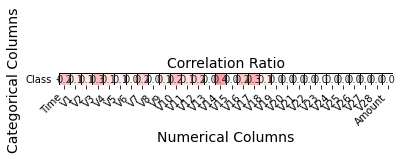

In [17]:
plot_correlation_ratio(df, catvar = ['Class'], numvar = list(features), report=False)

# 4. Dataset Splitting

In [18]:
X = df.drop(columns="Class")
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24393, 30), (6099, 30), (24393,), (6099,))

# 5. Modeling

In [19]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning.space import Integer, Real

In [20]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMClassifier(n_jobs=-1, random_state=42))
])


parameter = {'algo__num_leaves': Integer(low=60, high=300),
            'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=150, high=300),
            'algo__min_child_samples': Integer(low=10, high=40),
            'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
            'algo__class_weight': ['balanced']
}


model = RandomizedSearchCV(pipeline, parameter, cv=3, scoring='f1', n_iter= 100, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:   57.0s finished


{'algo__class_weight': 'balanced', 'algo__colsample_bytree': 0.767314820025141, 'algo__learning_rate': 0.1400559934786141, 'algo__max_depth': 6, 'algo__min_child_samples': 34, 'algo__min_child_weight': 0.002049849931784699, 'algo__n_estimators': 182, 'algo__num_leaves': 255, 'algo__reg_alpha': 1.379683179966857, 'algo__reg_lambda': 1.121591586866278, 'algo__subsample': 0.7383828183808748}
0.9949494949494949 0.9784242353339484 0.9696969696969697


# 6. Feature Importance

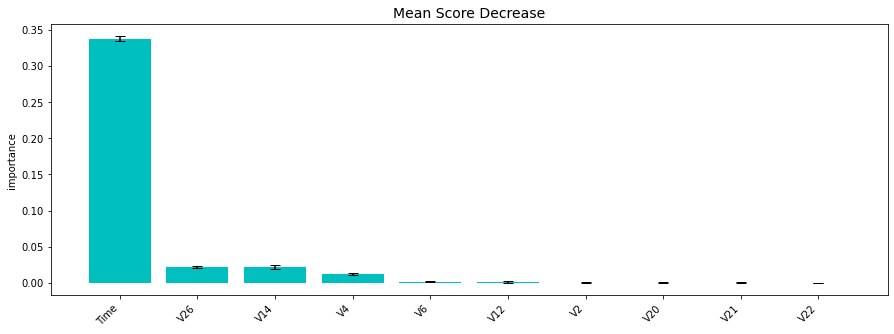

In [21]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

In [22]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(),['Time','V26','V14','V4'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMClassifier(n_jobs=-1, random_state=42))
])


parameter = {'algo__num_leaves': Integer(low=60, high=300),
            'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=150, high=300),
            'algo__min_child_samples': Integer(low=10, high=40),
            'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
            'algo__class_weight': ['balanced']
}

model = RandomizedSearchCV(pipeline, parameter, cv=5, scoring='f1',  n_iter= 150, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-2)]: Done 750 out of 750 | elapsed:  1.0min finished


{'algo__class_weight': 'balanced', 'algo__colsample_bytree': 0.9486187335212674, 'algo__learning_rate': 0.044300218067679815, 'algo__max_depth': 8, 'algo__min_child_samples': 18, 'algo__min_child_weight': 0.0025341724840778727, 'algo__n_estimators': 211, 'algo__num_leaves': 300, 'algo__reg_alpha': 0.3219814322305042, 'algo__reg_lambda': 0.009716374629919698, 'algo__subsample': 0.6481521364198942}
0.9949494949494949 0.9591405098366301 0.9504950495049506


`Feature has decreased test scores model. Therefore, I will use all of the columns`

# 7. Polynomial Feature

In [23]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2),['Time','V26','V14','V4'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMClassifier(n_jobs=-1, random_state=42))
])


parameter = {'prep__numeric__poly__degree': Integer(low=1, high=3),
             'prep__numeric__poly__interaction_only': [True, False],
             'algo__num_leaves': Integer(low=60, high=300),
             'algo__max_depth': Integer(low=1, high=10),
             'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
             'algo__n_estimators': Integer(low=150, high=300),
             'algo__min_child_samples': Integer(low=10, high=40),
             'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
             'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
             'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
             'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
             'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
             'algo__class_weight': ['balanced']
}


model = RandomizedSearchCV(pipeline, parameter, cv=5, scoring='f1',  n_iter= 50, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-2)]: Done 250 out of 250 | elapsed:   30.3s finished


{'algo__class_weight': 'balanced', 'algo__colsample_bytree': 0.9479815801163676, 'algo__learning_rate': 0.13383707472536774, 'algo__max_depth': 10, 'algo__min_child_samples': 18, 'algo__min_child_weight': 0.0010374477955901187, 'algo__n_estimators': 279, 'algo__num_leaves': 143, 'algo__reg_alpha': 0.3034247005811288, 'algo__reg_lambda': 0.5408216580718497, 'algo__subsample': 0.6049983288913106, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': True}
0.9987325728770595 0.9638951399477715 0.9651741293532338


# 8. Hyperparameter Tuning

In [32]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2),['Time','V26','V14','V4'])
])



pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMClassifier(n_jobs=-1, random_state=42))
])


parameter = {'algo__num_leaves': Integer(low=60, high=300),
             'algo__max_depth': Integer(low=1, high=10),
             'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
             'algo__n_estimators': Integer(low=150, high=300),
             'algo__min_child_samples': Integer(low=10, high=40),
             'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
             'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
             'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
             'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
             'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
             'algo__class_weight': [{0: x, 1: 1-x} for x in [0.05, 0.1, 0.15]]
}

model = RandomizedSearchCV(pipeline, parameter, cv=5, scoring='f1', n_iter= 100, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed:   48.7s finished


{'algo__class_weight': {0: 0.15, 1: 0.85}, 'algo__colsample_bytree': 0.5913241931484902, 'algo__learning_rate': 0.2580257016823823, 'algo__max_depth': 9, 'algo__min_child_samples': 19, 'algo__min_child_weight': 0.006870112902227846, 'algo__n_estimators': 294, 'algo__num_leaves': 289, 'algo__reg_alpha': 0.14730368526805257, 'algo__reg_lambda': 0.6366144994552213, 'algo__subsample': 0.33638150318209675}
0.9987325728770595 0.9641164963848731 0.9700000000000001


# 9. Evaluation

In [33]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_pr_curve, plot_roc_curve

## 9.1. Classification Report

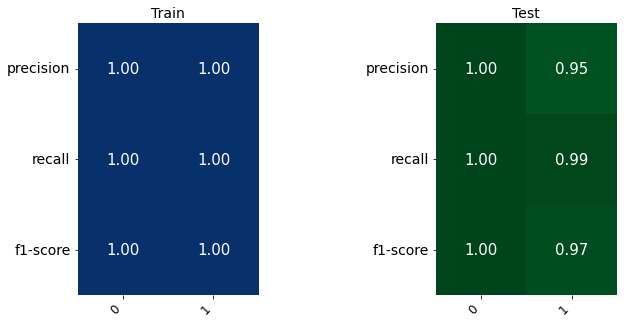

In [34]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

In [35]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23999
           1       1.00      1.00      1.00       394

    accuracy                           1.00     24393
   macro avg       1.00      1.00      1.00     24393
weighted avg       1.00      1.00      1.00     24393


Test report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6001
           1       0.95      0.99      0.97        98

    accuracy                           1.00      6099
   macro avg       0.98      0.99      0.98      6099
weighted avg       1.00      1.00      1.00      6099



## 9.2. Precision vs Recall

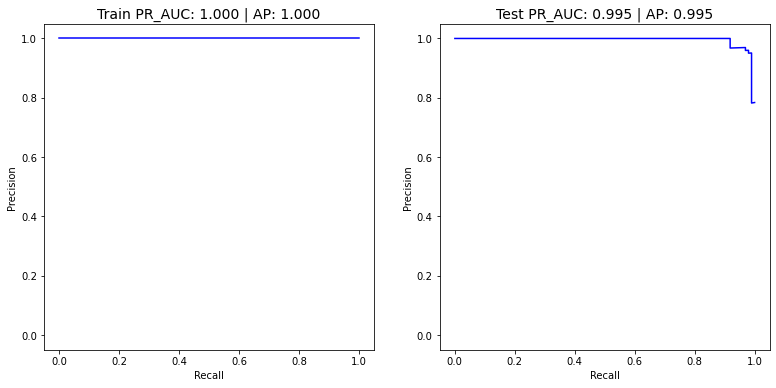

In [36]:
plot_pr_curve(X_train, y_train, X_test, y_test, model)

## 9.3. Confussion Matrix

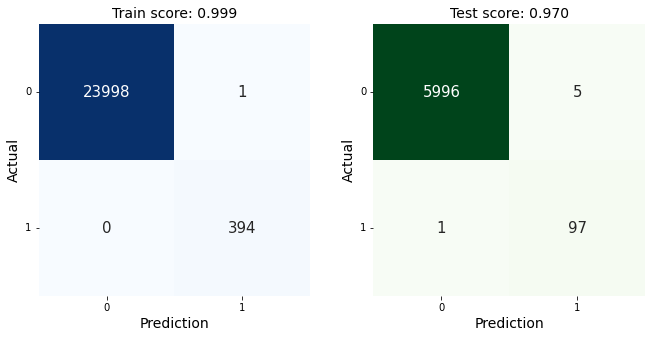

In [37]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

# 10. Save Model

In [38]:
save_model(model.best_estimator_, 'Credit_Card_Prediction_LGBM_Classifier.pkl')

Model is pickled as model/Credit_Card_Prediction_LGBM_Classifier.pkl
